In [1]:
import os
import sys

import matplotlib.pyplot as plt  # type: ignore
import pandas as pd  # type: ignore
import seaborn as sns  # type: ignore

sys.path.append(os.path.abspath(".."))

# Fix the import path
from model.model import run_coroutine

# Notebook-wide params
# Donʻt set no_ai here, it will be set in the models
my_args = {
    "steps": 8,
    "theta_star": 0.1,
    "churn_rate": 0.1,
}



Starting simulation at 1740526763.711901 with 8 steps.
Model params: {'alpha': 1, 'beta': 0.1, 'gamma': 1.5, 'delta': 0.75, 'theta_star': 0.1, 's_start': 100, 'w_start': 10, 'dt': 0.02, 's_max': 110, 'eps': 0.0001, 'steps': 8, 'churn_rate': 0.1, 'no_ai': False, 'save_results': True}
Model opts: {'no_ai': False, 'churn_rate': 0.1, 'save_results': True, 'path': '../data/results'}
Created results directory at: /Users/peterdresslar/Workspace/do-android-wolves-dream-of-electric-sheep/data/results
Simulation summary saved to /Users/peterdresslar/Workspace/do-android-wolves-dream-of-electric-sheep/data/results/Model_8_100-10_20250225_133941.md and details in directory /Users/peterdresslar/Workspace/do-android-wolves-dream-of-electric-sheep/data/results/Model_8_100-10_20250225_133941/_detailed_results
Simulation completed in 17.61369490623474 seconds.
Final sheep population: 110
Final wolf population: 10
Simulation completed 9 steps


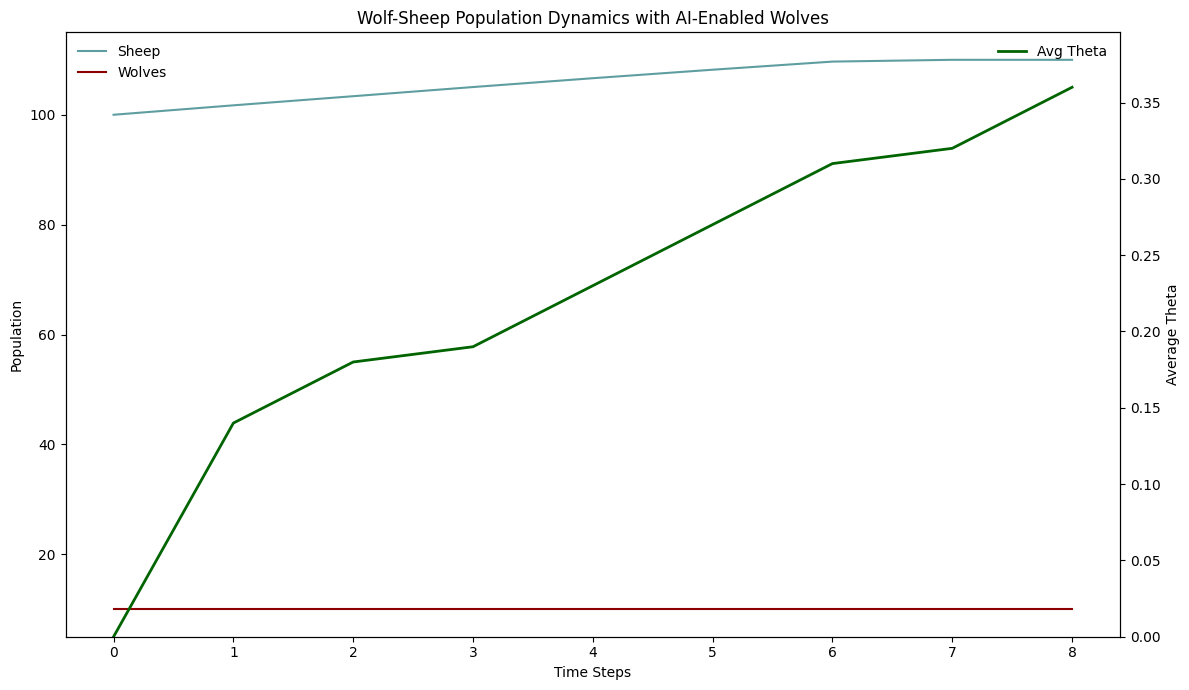

In [2]:
# Run model with AI-enabled wolves
ai_results = await run_coroutine(
    **my_args,
    no_ai=False,
    save_results=True
)

# Print some information about the results
print(f"Final sheep population: {ai_results['sheep_history'][-1]}")
print(f"Final wolf population: {ai_results['wolf_history'][-1]}")
print(f"Simulation completed {len(ai_results['sheep_history'])} steps")

# Convert results to a DataFrame for plotting
ai_df = pd.DataFrame(
    {
        "t": list(range(len(ai_results["sheep_history"]))),
        "Sheep": ai_results["sheep_history"],
        "Wolves": ai_results["wolf_history"],
        "Avg Theta": ai_results["average_theta_history"],
    }
)

# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot populations on left y-axis
sns.lineplot(
    data=pd.melt(ai_df, id_vars=["t"], value_vars=["Sheep", "Wolves"]),
    x="t",
    y="value",
    hue="variable",
    palette=["cadetblue", "darkred"],
    ax=ax1,
)

# Plot average theta on right y-axis
ax2 = ax1.twinx()
sns.lineplot(
    data=ai_df,
    x="t",
    y="Avg Theta",
    color="darkgreen",
    ax=ax2,
    linewidth=2,
)

# Set the y-axis limits for the right axis
max_theta = max(ai_results["average_theta_history"])
min_theta = min(ai_results["average_theta_history"])
theta_range = max_theta - min_theta
ax2.set_ylim(max(0, min_theta - 0.1 * theta_range), max_theta + 0.1 * theta_range)

# Add labels and legend
ax1.set_xlabel("Time Steps")
ax1.set_ylabel("Population")
ax2.set_ylabel("Average Theta")
ax1.legend(title="", loc="upper left", frameon=False)
ax2.legend(["Avg Theta"], loc="upper right", frameon=False)

plt.title("Wolf-Sheep Population Dynamics with AI-Enabled Wolves")
plt.tight_layout()

Starting simulation at 1740526781.497309 with 8 steps.
Model params: {'theta': 0.1, 'alpha': 1, 'beta': 0.1, 'gamma': 1.5, 'delta': 0.75, 'theta_star': 0.1, 's_start': 100, 'w_start': 10, 'dt': 0.02, 's_max': 110, 'eps': 0.0001, 'steps': 8, 'churn_rate': 0.1, 'no_ai': True, 'save_results': False}
Model opts: {'no_ai': True, 'churn_rate': 0.1, 'save_results': False, 'path': '../data/results'}


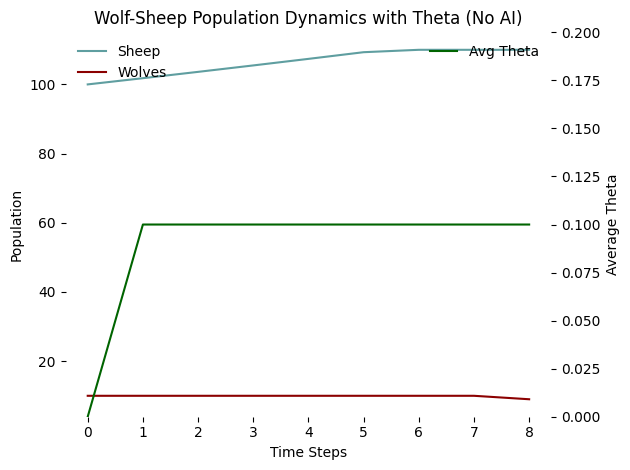

In [3]:
# Run model with no_ai=True (note the correct keyword argument syntax)
results = await run_coroutine(
    **my_args,
    no_ai=True,
    save_results=False
    )

# Convert results to a DataFrame for plotting
xdf = pd.DataFrame(
    {
        "t": list(range(len(results["sheep_history"]))),  # Use dictionary access with ["key"]
        "Sheep": results["sheep_history"],                    # instead of .attribute
        "Wolves": results["wolf_history"],
        "Avg Theta": results["average_theta_history"],
    }
)

# Plot populations on left y-axis
ax1 = plt.gca()
sns.lineplot(
    data=pd.melt(xdf, id_vars=["t"], value_vars=["Sheep", "Wolves"]),
    x="t",
    y="value",
    hue="variable",
    palette=["cadetblue", "darkred"],
    ax=ax1,
)

# Plot average theta on right y-axis
ax2 = ax1.twinx()
sns.lineplot(
    data=xdf,
    x="t",
    y="Avg Theta",
    color="darkgreen",
    ax=ax2,
)

# Set the y-axis limits for the right axis to make theta more visible
# Scale to approximately 2x the max theta value
max_theta = max(results["average_theta_history"])
ax2.set_ylim(0, max_theta * 2)

ax2.set_ylabel("Average Theta")

# Customize the plot
ax1.set_xlabel("Time Steps")
ax1.set_ylabel("Population")
ax1.legend(title="", loc="upper left", frameon=False)
ax2.legend(["Avg Theta"], loc="upper right", frameon=False)

sns.despine(left=True, bottom=True)
plt.title("Wolf-Sheep Population Dynamics with Theta (No AI)")
plt.tight_layout()

Text(0.5, 1.02, 'Comparison: Fixed vs. Adaptive Hunting Strategies')

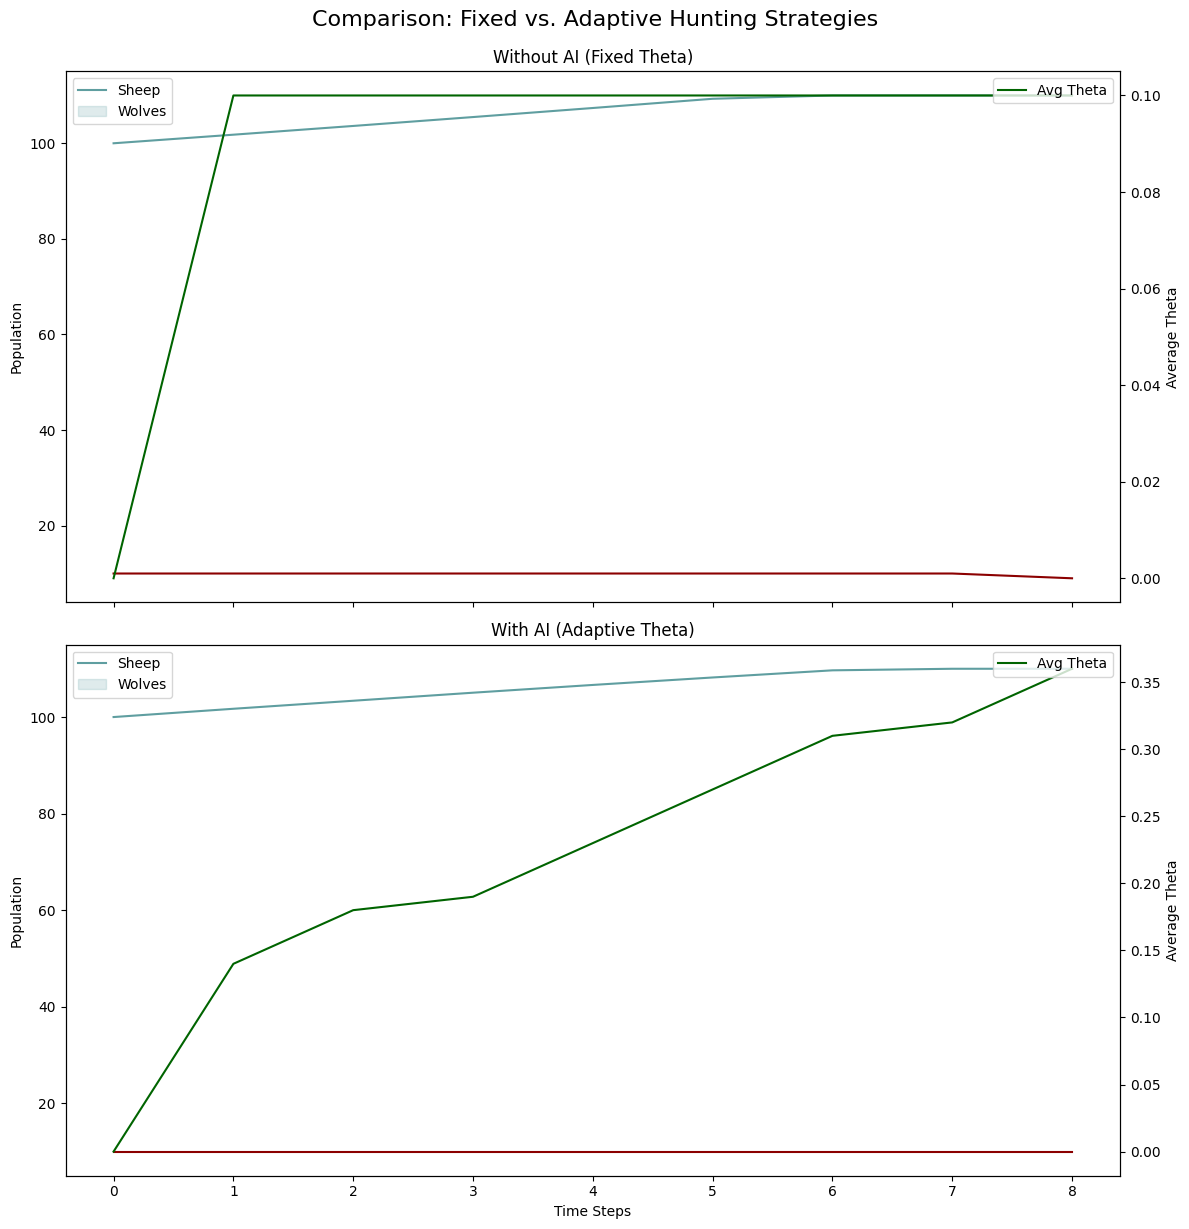

In [4]:
# Create a comparison plot
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot non-AI results on top subplot
ax1_top = axes[0]
sns.lineplot(
    data=pd.melt(xdf, id_vars=["t"], value_vars=["Sheep", "Wolves"]),
    x="t",
    y="value",
    hue="variable",
    palette=["cadetblue", "darkred"],
    ax=ax1_top,
)
ax2_top = ax1_top.twinx()
sns.lineplot(
    data=xdf,
    x="t",
    y="Avg Theta",
    color="darkgreen",
    ax=ax2_top,
)
ax1_top.set_ylabel("Population")
ax2_top.set_ylabel("Average Theta")
ax1_top.legend(["Sheep", "Wolves"], loc="upper left")
ax2_top.legend(["Avg Theta"], loc="upper right")
ax1_top.set_title("Without AI (Fixed Theta)")

# Plot AI results on bottom subplot
ax1_bottom = axes[1]
sns.lineplot(
    data=pd.melt(ai_df, id_vars=["t"], value_vars=["Sheep", "Wolves"]),
    x="t",
    y="value",
    hue="variable",
    palette=["cadetblue", "darkred"],
    ax=ax1_bottom,
)
ax2_bottom = ax1_bottom.twinx()
sns.lineplot(
    data=ai_df,
    x="t",
    y="Avg Theta",
    color="darkgreen",
    ax=ax2_bottom,
)
ax1_bottom.set_xlabel("Time Steps")
ax1_bottom.set_ylabel("Population")
ax2_bottom.set_ylabel("Average Theta")
ax1_bottom.legend(["Sheep", "Wolves"], loc="upper left")
ax2_bottom.legend(["Avg Theta"], loc="upper right")
ax1_bottom.set_title("With AI (Adaptive Theta)")

plt.tight_layout()
plt.suptitle("Comparison: Fixed vs. Adaptive Hunting Strategies", y=1.02, fontsize=16)